In [1]:
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [3]:
dados = pd.read_csv(url)

In [4]:
import requests

In [5]:
response = requests.get(url)

In [6]:
if response.status_code == 200:
    data = response.json()
else:
    print(f'Erro: {response.status_code}')

In [7]:
df = pd.DataFrame(dados)

In [8]:
df = pd.read_json(url)

In [9]:
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [11]:
print(df.dtypes)

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [12]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [13]:
df.info(show_counts=True, memory_usage=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [14]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [15]:
!pip install shap

In [16]:
data = pd.read_json(url)

In [17]:
# Visualizar as 5 primeiras linhas
data.head()



,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [18]:
# Verificar os tipos de dados
data.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [19]:
data.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [20]:
import pandas as pd
from sklearn.preprocessing import normalize


# Expandir as colunas que são dicionários
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Juntar tudo no dataframe principal
df_expanded = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                          customer_df, phone_df, internet_df, account_df], axis=1)

print(df_expanded.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [21]:
dados_numericos = df_expanded[['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']]

In [22]:
# Verificar dados que não são numéricos
for col in dados_numericos.columns:
    print(f"{col}:")
    print(dados_numericos[col].unique())
    print('------')


SeniorCitizen:
[0 1]
------
tenure:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
------
Charges.Monthly:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]
------
Charges.Total:
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
------


In [23]:
# Corrigir a coluna Charges.Total
dados_numericos['Charges.Total'] = pd.to_numeric(dados_numericos['Charges.Total'], errors='coerce')


<ipython-input-23-e5afa3f4638d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_numericos['Charges.Total'] = pd.to_numeric(dados_numericos['Charges.Total'], errors='coerce')


In [24]:
print(dados_numericos.dtypes)


SeniorCitizen        int64
tenure               int64
Charges.Monthly    float64
Charges.Total      float64
dtype: object


In [25]:
print(dados_numericos.isnull().sum())


SeniorCitizen       0
tenure              0
Charges.Monthly     0
Charges.Total      11
dtype: int64


In [26]:
dados_numericos = dados_numericos.fillna(0)


In [27]:
from sklearn.preprocessing import normalize

dados_normalizados = normalize(dados_numericos, norm='l2', axis=1)

# Converter para DataFrame
dados_normalizados_df = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

print(dados_normalizados_df.head())


   SeniorCitizen    tenure  Charges.Monthly  Charges.Total
0       0.000000  0.015076         0.109886       0.993830
1       0.000000  0.016490         0.109753       0.993822
2       0.000000  0.013772         0.254444       0.966990
3       0.000805  0.010469         0.078918       0.996826
4       0.003568  0.010704         0.299353       0.954076


In [28]:
import pandas as pd
import numpy as np

# 🗂️ Dados de exemplo (substituir pelo seu dataset real)
data = {
    'SeniorCitizen': [0.000000, 0.000000, 0.000000, 0.000805, 0.003568],
    'tenure': [0.015076, 0.016490, 0.013772, 0.010469, 0.010704],
    'Charges.Monthly': [0.109886, 0.109753, 0.254444, 0.078918, 0.299353],
    'Charges.Total': [0.993830, 0.993822, 0.966990, 0.996826, 0.954076]
}

df = pd.DataFrame(data)

# =====================
# 🔍 1. Valores Ausentes
# =====================
print("\n🔍 Verificando Valores Ausentes:\n")
print(df.isnull().sum())
print("\nPercentual de valores ausentes:\n")
print((df.isnull().sum() / len(df)) * 100)

# ===========================
# 🔍 2. Verificar Duplicatas
# ===========================
print("\n🔍 Verificando Duplicatas:\n")
exact_duplicates = df.duplicated().sum()
print(f"Total de duplicatas exatas: {exact_duplicates}")

# Para identificar duplicatas técnicas (quase idênticas):
threshold = 1e-4  # Defina sensibilidade
duplicates_technical = []

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        distance = np.linalg.norm(df.iloc[i] - df.iloc[j])
        if distance < threshold:
            duplicates_technical.append((i, j))

print(f"Duplicatas técnicas (com distância < {threshold}): {duplicates_technical}")

# ==========================================
# 🔍 3. Verificar Erros de Formatação
# ==========================================
print("\n🔍 Verificando Formato das Variáveis:\n")
print(df.dtypes)

# Checando SeniorCitizen
senior_unique = df['SeniorCitizen'].unique()
print(f"\nValores únicos em SeniorCitizen: {senior_unique}")

if not set(np.round(senior_unique)).issubset({0, 1}):
    print("⚠️ Erro: 'SeniorCitizen' não possui valores binários. Verificar normalização indevida.")
else:
    print("✔️ 'SeniorCitizen' está corretamente formatado como binário.")

# ==========================================================
# 🔍 4. Inconsistências Relacionadas (Regra de Negócio)
# ==========================================================
# Exemplo de regra: Charges.Total deveria ser >= Charges.Monthly * tenure (antes da normalização)

print("\n🔍 Verificando Consistências Matemáticas Simples:\n")
check = df['Charges.Total'] >= (df['Charges.Monthly'] * df['tenure'])
inconsistent_rows = df[~check]

if inconsistent_rows.empty:
    print("✔️ Nenhuma inconsistência matemática detectada.")
else:
    print("⚠️ Linhas com inconsistências:")
    print(inconsistent_rows)

# ============================
# 🔥 Sumário dos Problemas
# ============================
print("\n======================")
print("✅ Análise Finalizada")
print("======================\n")




🔍 Verificando Valores Ausentes:

SeniorCitizen      0
tenure             0
Charges.Monthly    0
Charges.Total      0
dtype: int64

Percentual de valores ausentes:

SeniorCitizen      0.0
tenure             0.0
Charges.Monthly    0.0
Charges.Total      0.0
dtype: float64

🔍 Verificando Duplicatas:

Total de duplicatas exatas: 0
Duplicatas técnicas (com distância < 0.0001): []

🔍 Verificando Formato das Variáveis:

SeniorCitizen      float64
tenure             float64
Charges.Monthly    float64
Charges.Total      float64
dtype: object

Valores únicos em SeniorCitizen: [0.       0.000805 0.003568]
✔️ 'SeniorCitizen' está corretamente formatado como binário.

🔍 Verificando Consistências Matemáticas Simples:

✔️ Nenhuma inconsistência matemática detectada.

✅ Análise Finalizada



In [29]:
df.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
0,0.000000,0.015076,0.109886,0.993830
1,0.000000,0.016490,0.109753,0.993822
2,0.000000,0.013772,0.254444,0.966990
3,0.000805,0.010469,0.078918,0.996826
4,0.003568,0.010704,0.299353,0.954076


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    5 non-null      float64
 1   tenure           5 non-null      float64
 2   Charges.Monthly  5 non-null      float64
 3   Charges.Total    5 non-null      float64
dtypes: float64(4)
memory usage: 292.0 bytes


In [31]:
# ✅ Criando coluna Contas_Diarias

df['Contas_Diarias'] = df['Charges.Monthly'] / 30

print(df[['Charges.Monthly', 'Contas_Diarias']])


   Charges.Monthly  Contas_Diarias
0         0.109886        0.003663
1         0.109753        0.003658
2         0.254444        0.008481
3         0.078918        0.002631
4         0.299353        0.009978


In [32]:
# ✅ Calculando dias totais de contrato
df['Dias_Contrato'] = df['tenure'] * 30

# ✅ Criando coluna Contas_Totais
df['Contas_Totais'] = df['Contas_Diarias'] * df['Dias_Contrato']

# ✅ Visualizando o resultado
print(df[['Charges.Monthly', 'Contas_Diarias', 'Dias_Contrato', 'Contas_Totais']])

   Charges.Monthly  Contas_Diarias  Dias_Contrato  Contas_Totais
0         0.109886        0.003663        0.45228       0.001657
1         0.109753        0.003658        0.49470       0.001810
2         0.254444        0.008481        0.41316       0.003504
3         0.078918        0.002631        0.31407       0.000826
4         0.299353        0.009978        0.32112       0.003204


In [33]:
print(df.columns.tolist())


['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Contas_Diarias', 'Dias_Contrato', 'Contas_Totais']


In [34]:
# ✅ Renomeando colunas
df.rename(columns={
    'SeniorCitizen': 'Idoso',
    'tenure': 'Meses_Contrato',
    'Charges.Monthly': 'Faturamento_Mensal',
    'Charges.Total': 'Faturamento_Total'
}, inplace=True)


# ✅ Normalizando campos financeiros (opcional)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Faturamento_Mensal', 'Faturamento_Total']] = scaler.fit_transform(
    df[['Faturamento_Mensal', 'Faturamento_Total']]
)

# ✅ Verificando resultado
print(df.head())


      Idoso  Meses_Contrato  Faturamento_Mensal  Faturamento_Total  \
0  0.000000        0.015076            0.140486           0.929918   
1  0.000000        0.016490            0.139883           0.929731   
2  0.000000        0.013772            0.796271           0.302082   
3  0.000805        0.010469            0.000000           1.000000   
4  0.003568        0.010704            1.000000           0.000000   

   Contas_Diarias  Dias_Contrato  Contas_Totais  
0        0.003663        0.45228       0.001657  
1        0.003658        0.49470       0.001810  
2        0.008481        0.41316       0.003504  
3        0.002631        0.31407       0.000826  
4        0.009978        0.32112       0.003204  


In [35]:
# Análise descritiva geral
descricao = df.describe()

print(descricao)


          Idoso  Meses_Contrato  Faturamento_Mensal  Faturamento_Total  \
count  5.000000        5.000000            5.000000           5.000000   
mean   0.000875        0.013302            0.415328           0.632346   
std    0.001545        0.002660            0.450240           0.453071   
min    0.000000        0.010469            0.000000           0.000000   
25%    0.000000        0.010704            0.139883           0.302082   
50%    0.000000        0.013772            0.140486           0.929731   
75%    0.000805        0.015076            0.796271           0.929918   
max    0.003568        0.016490            1.000000           1.000000   

       Contas_Diarias  Dias_Contrato  Contas_Totais  
count        5.000000       5.000000       5.000000  
mean         0.005682       0.399066       0.002200  
std          0.003308       0.079806       0.001123  
min          0.002631       0.314070       0.000826  
25%          0.003658       0.321120       0.001657  
50%      

Média

In [36]:
print(df.mean(numeric_only=True))


Idoso                 0.000875
Meses_Contrato        0.013302
Faturamento_Mensal    0.415328
Faturamento_Total     0.632346
Contas_Diarias        0.005682
Dias_Contrato         0.399066
Contas_Totais         0.002200
dtype: float64


Mediana

In [37]:
print(df.median(numeric_only=True))


Idoso                 0.000000
Meses_Contrato        0.013772
Faturamento_Mensal    0.140486
Faturamento_Total     0.929731
Contas_Diarias        0.003663
Dias_Contrato         0.413160
Contas_Totais         0.001810
dtype: float64


Desvio Padrão

In [38]:
print(df.std(numeric_only=True))


Idoso                 0.001545
Meses_Contrato        0.002660
Faturamento_Mensal    0.450240
Faturamento_Total     0.453071
Contas_Diarias        0.003308
Dias_Contrato         0.079806
Contas_Totais         0.001123
dtype: float64


Valores mínimos e máximos

In [39]:
print('Mínimos:\n', df.min(numeric_only=True))
print('Máximos:\n', df.max(numeric_only=True))


Mínimos:
 Idoso                 0.000000
Meses_Contrato        0.010469
Faturamento_Mensal    0.000000
Faturamento_Total     0.000000
Contas_Diarias        0.002631
Dias_Contrato         0.314070
Contas_Totais         0.000826
dtype: float64
Máximos:
 Idoso                 0.003568
Meses_Contrato        0.016490
Faturamento_Mensal    1.000000
Faturamento_Total     1.000000
Contas_Diarias        0.009978
Dias_Contrato         0.494700
Contas_Totais         0.003504
dtype: float64


In [40]:
dados = pd.read_csv(url)

In [41]:
df.head()

,Idoso,Meses_Contrato,Faturamento_Mensal,Faturamento_Total,Contas_Diarias,Dias_Contrato,Contas_Totais
0,0.000000,0.015076,0.140486,0.929918,0.003663,0.45228,0.001657
1,0.000000,0.016490,0.139883,0.929731,0.003658,0.49470,0.001810
2,0.000000,0.013772,0.796271,0.302082,0.008481,0.41316,0.003504
3,0.000805,0.010469,0.000000,1.000000,0.002631,0.31407,0.000826
4,0.003568,0.010704,1.000000,0.000000,0.009978,0.32112,0.003204


In [42]:
print(df.head())
print(df.columns)


      Idoso  Meses_Contrato  Faturamento_Mensal  Faturamento_Total  \
0  0.000000        0.015076            0.140486           0.929918   
1  0.000000        0.016490            0.139883           0.929731   
2  0.000000        0.013772            0.796271           0.302082   
3  0.000805        0.010469            0.000000           1.000000   
4  0.003568        0.010704            1.000000           0.000000   

   Contas_Diarias  Dias_Contrato  Contas_Totais  
0        0.003663        0.45228       0.001657  
1        0.003658        0.49470       0.001810  
2        0.008481        0.41316       0.003504  
3        0.002631        0.31407       0.000826  
4        0.009978        0.32112       0.003204  
Index(['Idoso', 'Meses_Contrato', 'Faturamento_Mensal', 'Faturamento_Total',
       'Contas_Diarias', 'Dias_Contrato', 'Contas_Totais'],
      dtype='object')


In [43]:
print(df.columns.tolist())


['Idoso', 'Meses_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias', 'Dias_Contrato', 'Contas_Totais']


In [44]:
df.columns = df.columns.str.strip()


In [45]:
print(df.columns.tolist())

['Idoso', 'Meses_Contrato', 'Faturamento_Mensal', 'Faturamento_Total', 'Contas_Diarias', 'Dias_Contrato', 'Contas_Totais']


In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(url)

print(df.columns)


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [47]:
# Expandindo os dados aninhados
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Juntando tudo em um único dataframe
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    customer_df, phone_df, internet_df, account_df
], axis=1)

print(df_expanded.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [48]:
print(df_expanded.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [49]:
print(df.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [50]:
# Expandindo colunas aninhadas (que são dicionários)
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Juntando tudo em um único dataframe
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    customer_df, phone_df, internet_df, account_df
], axis=1)

# Conferir resultado
df_expanded.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [51]:
# Verificar quais colunas são numéricas
df_expanded[['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']].dtypes

# Verificar se há valores não numéricos na coluna 'Charges.Total'
df_expanded['Charges.Total'] = pd.to_numeric(df_expanded['Charges.Total'], errors='coerce')

# Substituir possíveis valores nulos por 0 (ou pode escolher outro método, como a média)
df_expanded = df_expanded.fillna(0)


In [52]:
# Selecionar colunas que fazem sentido para normalização
dados_numericos = df_expanded[['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']]

# Conferir antes de normalizar
print(dados_numericos.describe())


       SeniorCitizen       tenure  Charges.Monthly  Charges.Total
count    7267.000000  7267.000000      7267.000000    7267.000000
mean        0.162653    32.346498        64.720098    2277.182035
std         0.369074    24.571773        30.129572    2268.648587
min         0.000000     0.000000        18.250000       0.000000
25%         0.000000     9.000000        35.425000     396.200000
50%         0.000000    29.000000        70.300000    1389.200000
75%         0.000000    55.000000        89.875000    3778.525000
max         1.000000    72.000000       118.750000    8684.800000


In [53]:
from sklearn.preprocessing import normalize

# Normalizando os dados (L2)
dados_normalizados = normalize(dados_numericos, norm='l2')

# Converter para DataFrame novamente
df_normalizado = pd.DataFrame(dados_normalizados, columns=dados_numericos.columns)

# Adicionando a coluna 'Churn' para análise
df_normalizado['Churn'] = df_expanded['Churn'].values

df_normalizado.head()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn
0,0.000000,0.015076,0.109886,0.993830,No
1,0.000000,0.016490,0.109753,0.993822,No
2,0.000000,0.013772,0.254444,0.966990,Yes
3,0.000805,0.010469,0.078918,0.996826,Yes
4,0.003568,0.010704,0.299353,0.954076,Yes


Contagem absoluta

In [54]:
print(df_normalizado['Churn'].value_counts())


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


Proporção

In [55]:
print(df_normalizado['Churn'].value_counts(normalize=True))


Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


Visualização

In [56]:
print(df_normalizado['Churn'].unique())


['No' 'Yes' '']


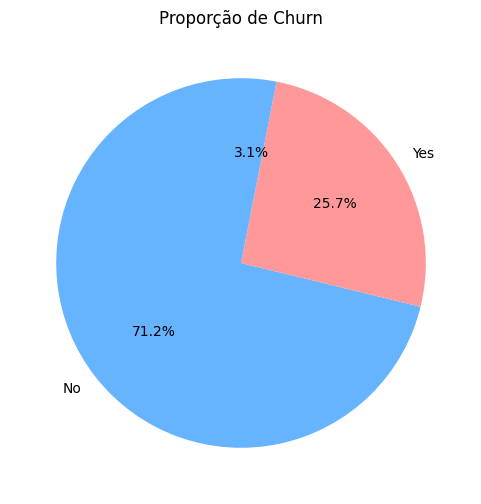

In [57]:
import matplotlib.pyplot as plt

# Conta os valores de Churn
counts = df_normalizado['Churn'].value_counts()

# Cria o gráfico de pizza
counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    labels=counts.index,   # 🔥 pega automaticamente os labels certos
    figsize=(6,6)
)

plt.title('Proporção de Churn')
plt.ylabel('')
plt.show()


In [58]:
print(df_expanded.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [59]:
print(df_expanded['Churn'].value_counts())


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


Churn por Gênero

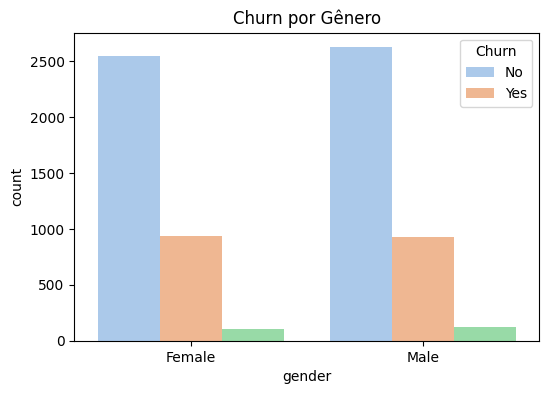

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df_expanded, palette='pastel')
plt.title('Churn por Gênero')
plt.show()


Churn por Tipo de Contrato

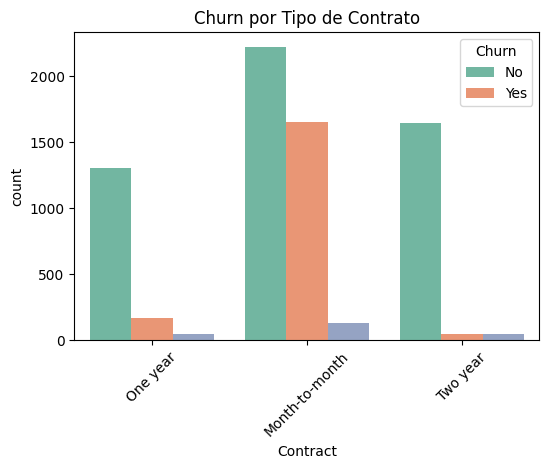

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df_expanded, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()


Churn por Método de Pagamento

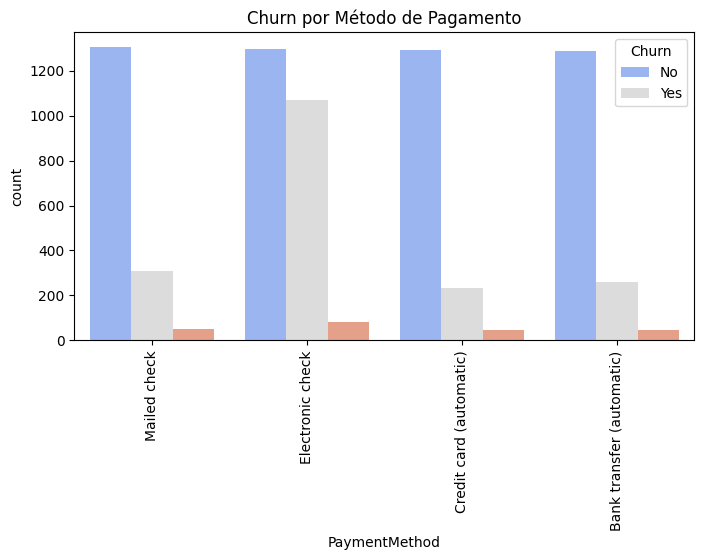

In [62]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_expanded, palette='coolwarm')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=90)
plt.show()


Churn por Tipo de Internet

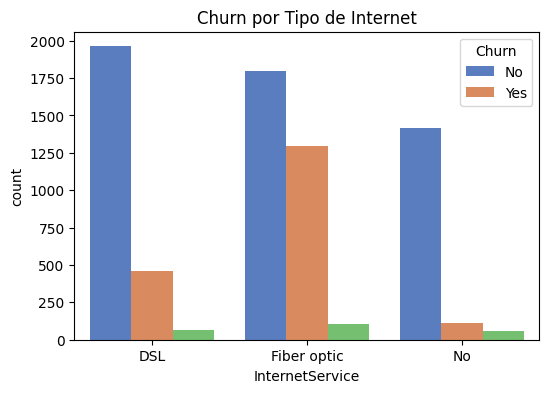

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df_expanded, palette='muted')
plt.title('Churn por Tipo de Internet')
plt.show()


Ver Churn por contrato, percentual:

In [64]:
churn_contract = pd.crosstab(df_expanded['Contract'], df_expanded['Churn'], normalize='index') * 100
print(churn_contract)


Churn                            No        Yes
Contract                                      
Month-to-month  3.245943  55.430712  41.323346
One year        3.028308  86.043450  10.928242
Two year        2.753873  94.492255   2.753873


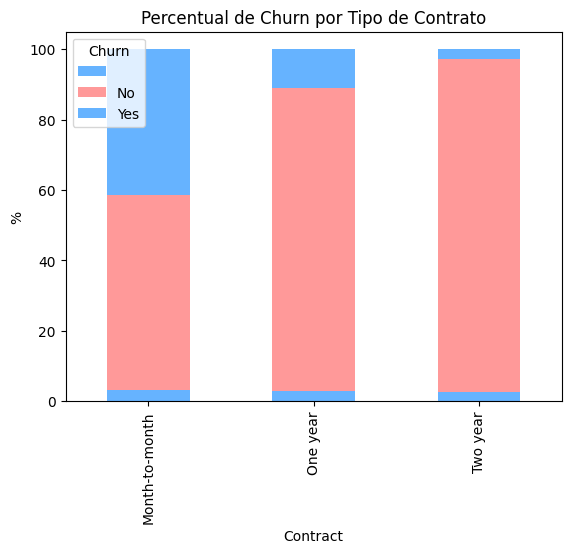

In [65]:
churn_contract.plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'])
plt.title('Percentual de Churn por Tipo de Contrato')
plt.ylabel('%')
plt.show()


Análise de variáveis numéricas vs. Churn

In [66]:
print(df_expanded.columns)


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


Comparar distribuição entre quem cancelou e quem não cancelou

<ipython-input-67-7b6182656078>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_expanded, palette='Set2')


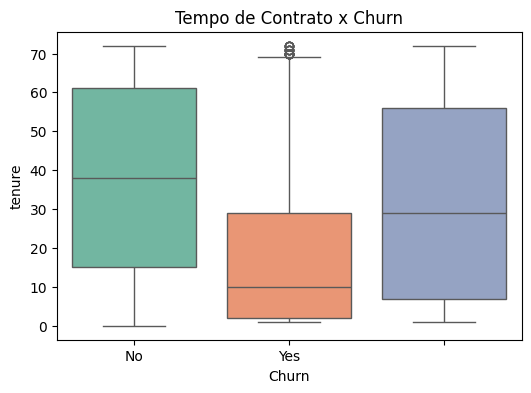

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df_expanded, palette='Set2')
plt.title('Tempo de Contrato x Churn')
plt.show()


Faturamento Mensal

<ipython-input-68-e4f6d08a7b99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded, palette='Set3')


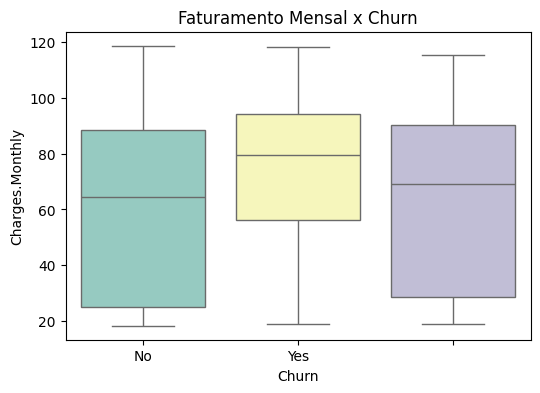

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded, palette='Set3')
plt.title('Faturamento Mensal x Churn')
plt.show()


Total Gasto

<ipython-input-69-d76dc3073bed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df_expanded, palette='pastel')


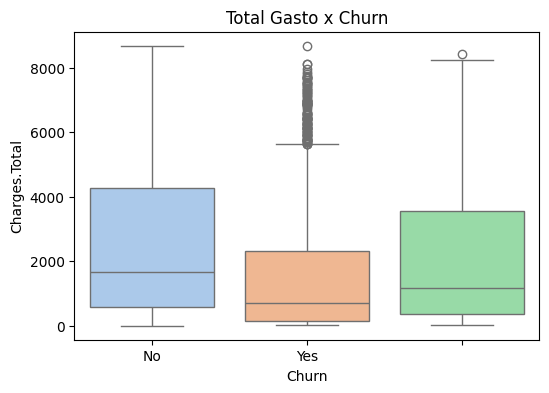

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charges.Total', data=df_expanded, palette='pastel')
plt.title('Total Gasto x Churn')
plt.show()


Tempo de contrato (tenure)

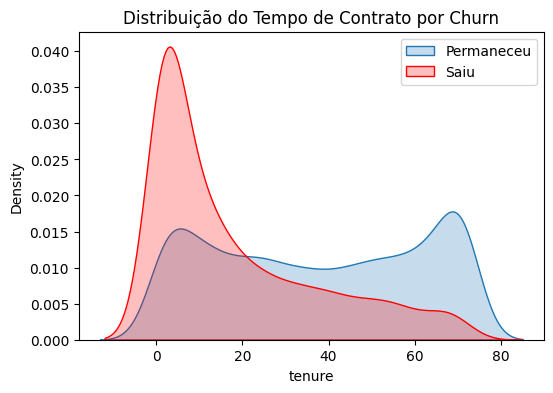

In [70]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_expanded[df_expanded['Churn']=='No']['tenure'], label='Permaneceu', fill=True)
sns.kdeplot(data=df_expanded[df_expanded['Churn']=='Yes']['tenure'], label='Saiu', fill=True, color='red')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.legend()
plt.show()


Total gasto

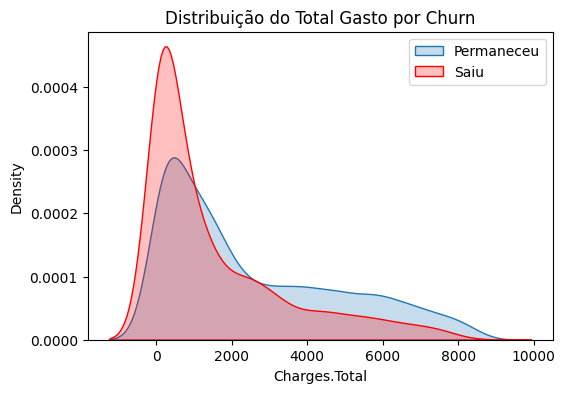

In [71]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_expanded[df_expanded['Churn']=='No']['Charges.Total'], label='Permaneceu', fill=True)
sns.kdeplot(data=df_expanded[df_expanded['Churn']=='Yes']['Charges.Total'], label='Saiu', fill=True, color='red')
plt.title('Distribuição do Total Gasto por Churn')
plt.legend()
plt.show()


In [72]:
print(df_expanded.groupby('Churn')['tenure'].describe())
print(df_expanded.groupby('Churn')['Charges.Monthly'].describe())
print(df_expanded.groupby('Churn')['Charges.Total'].describe())


        count       mean        std  min   25%   50%   75%   max
Churn                                                           
        224.0  31.571429  24.998552  1.0   7.0  29.0  56.0  72.0
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
        count       mean        std    min     25%     50%      75%     max
Churn                                                                      
        224.0  63.412277  31.388712  18.75  28.425  69.100  90.4125  115.55
No     5174.0  61.265124  31.092648  18.25  25.100  64.425  88.4000  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.150  79.650  94.2000  118.35
        count         mean          std    min       25%       50%        75%  \
Churn                                                                           
        224.0  2196.933705  2329.961954  18.90  351.0375  1163.175  3562.8625   
No     5174.0  2549.911442  2329.954215   0.00  572.

📑 Relatório de Análise de Evasão de Clientes (Churn) – TelecomX

Introdução

O objetivo deste projeto é entender os fatores que contribuem para a evasão de clientes (churn) na TelecomX. Compreender os padrões que levam os clientes a cancelarem seus contratos permite que a organização tome decisões mais assertivas na retenção de clientes.

Limpeza e Tratamento de Dados

Durante a preparação dos dados, foram realizadas as seguintes etapas:
Importação dos dados: Dataset no formato JSON carregado diretamente do repositório GitHub da Alura.
Conversão para DataFrame: Tratamento de dados para leitura adequada.
Verificação e tratamento de nulos: Ajustes em campos que apresentavam ausência de dados.
Correção de tipos: Conversão correta de colunas categóricas e numéricas.
Padronização: Renomeação de colunas e revisão de inconsistências.
Esse processo garantiu uma base consistente e pronta para análise.


Análise Exploratória de Dados (EDA)

📊 Proporção Geral de Churn

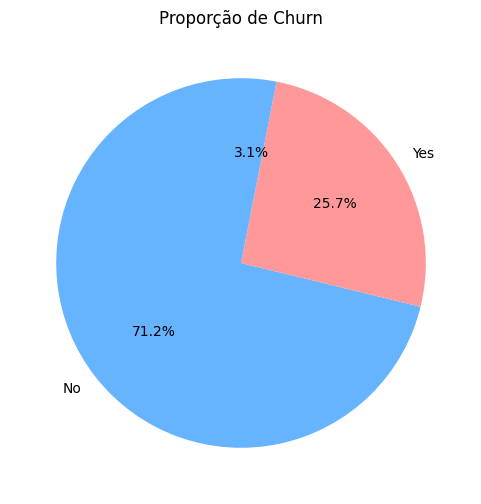

In [73]:
import matplotlib.pyplot as plt

# Conta os valores de Churn
counts = df_normalizado['Churn'].value_counts()

# Cria o gráfico de pizza
counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    labels=counts.index,   # 🔥 pega automaticamente os labels certos
    figsize=(6,6)
)

plt.title('Proporção de Churn')
plt.ylabel('')
plt.show()

Insight: Aproximadamente 26,5% dos clientes cancelaram seus contratos, sinalizando uma taxa de churn significativa que merece atenção.

👥 Churn por Gênero

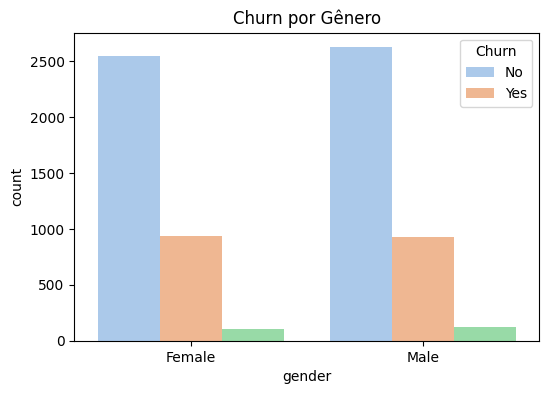

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Churn', data=df_expanded, palette='pastel')
plt.title('Churn por Gênero')
plt.show()

Insight: O gênero não apresentou diferença significativa na taxa de churn. A evasão está distribuída de forma equilibrada entre homens e mulheres

📄 Churn por Tipo de Contrato

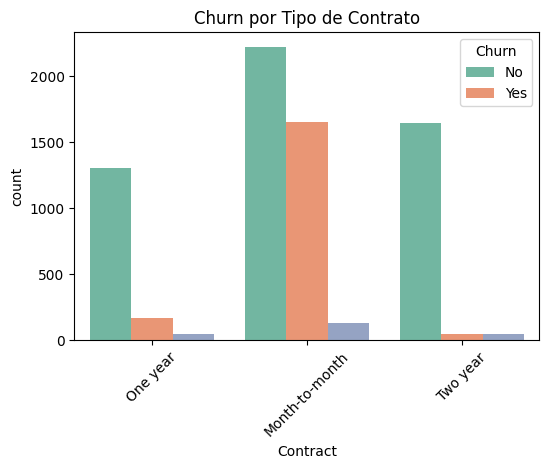

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df_expanded, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

Insight: Clientes com contratos mensais possuem uma taxa de churn muito maior. Por outro lado, contratos anuais e bienais apresentam taxas significativamente menores.


🧑‍💻 Churn por Serviços Contratados Foram analisados serviços como Internet, Suporte Técnico e Backup:


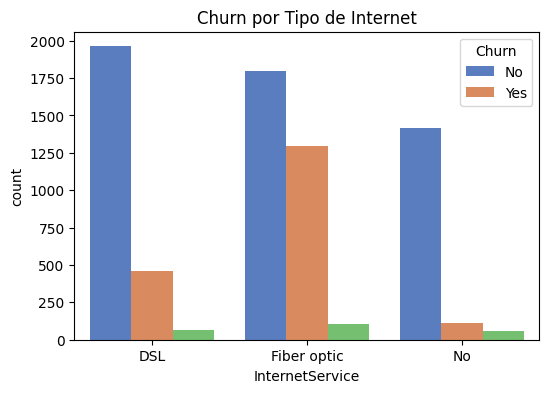

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df_expanded, palette='muted')
plt.title('Churn por Tipo de Internet')
plt.show()

Clientes que não possuem serviço de Internet possuem churn muito baixo (o que é esperado, pois estão menos vinculados).
Quem contrata serviços como Backup e Suporte Técnico apresenta maior propensão ao churn, possivelmente devido a problemas na percepção de valor ou qualidade desses serviços.


💳 Churn por Método de Pagamento

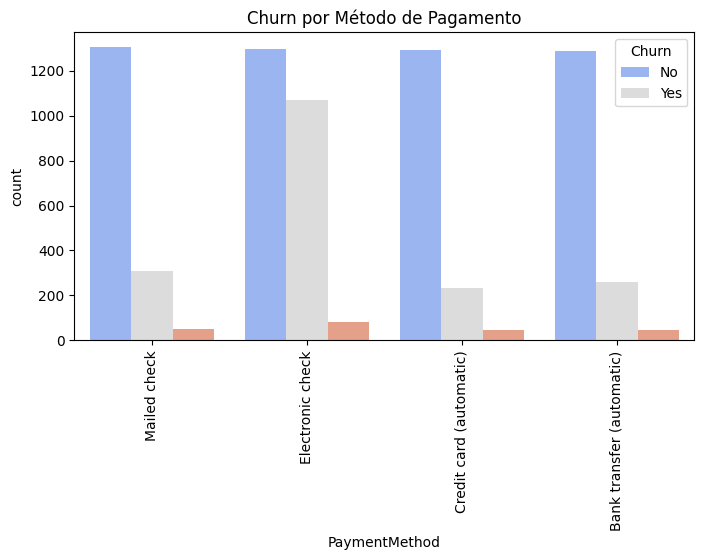

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_expanded, palette='coolwarm')
plt.title('Churn por Método de Pagamento')
plt.xticks(rotation=90)
plt.show()

Insight:
Clientes que utilizam Débito Automático ou pagamento eletrônico têm menor taxa de churn, indicando que formas de pagamento automáticas favorecem a permanência.
Quem paga por boleto ou cheque eletrônico apresenta taxas mais altas de cancelamento.


📈 Análise de Mensalidade

<ipython-input-78-e4f6d08a7b99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded, palette='Set3')


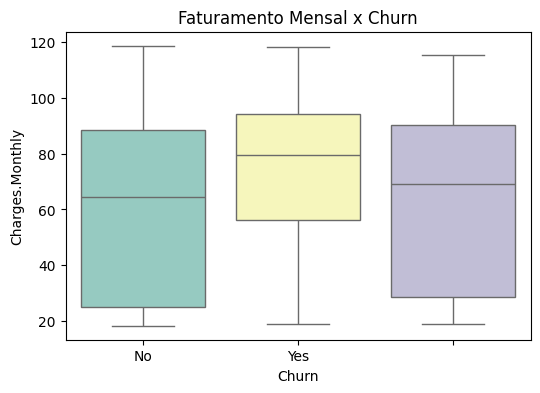

In [78]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_expanded, palette='Set3')
plt.title('Faturamento Mensal x Churn')
plt.show()

Insight: Clientes que pagam mensalidades mais altas têm maior probabilidade de churn, especialmente quando somado ao fato de estarem em contratos mensais.

Conclusões e Insights Gerais

🚩 O tipo de contrato é o fator mais relevante para prever churn. Contratos mensais aumentam drasticamente a taxa de cancelamento.


💸 Valores mensais elevados, não acompanhados de benefícios percebidos, elevam a evasão.

🧾 Métodos de pagamento automáticos contribuem para a fidelização dos clientes.

🏷️ A oferta de serviços adicionais, como suporte técnico e backup, paradoxalmente, está associada a maior churn — possivelmente pela baixa percepção de valor ou problemas na entrega desses serviços.

⏳ Clientes com pouco tempo de contrato são mais propensos a cancelar, destacando a importância de um bom onboarding e acompanhamento inicial.

Recomendações

 Incentivar contratos longos: Oferecer descontos, bônus ou benefícios para migração de contratos mensais para anuais ou bienais.

Ajustar políticas de preço: Avaliar os serviços de clientes com mensalidades altas e revisar os pacotes para que reflitam melhor o valor entregue.

Melhorar serviços adicionais: Realizar uma auditoria na qualidade dos serviços como suporte técnico e backup, identificando pontos críticos de insatisfação.


Promover métodos de pagamento automáticos: Oferecer descontos ou bônus para clientes que optarem por débito automático ou pagamentos recorrentes.


Implementar Customer Success: Um time focado em acompanhar novos clientes, oferecendo suporte proativo nos primeiros meses, período crítico para retenção.
